<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

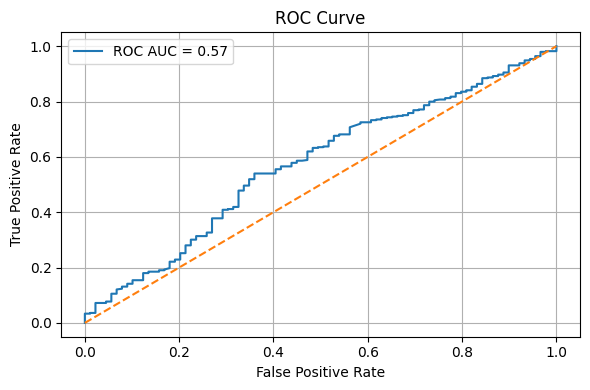

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv("train_mordred_phenol_scaled_reduced.csv")
test_df = pd.read_csv("test_mordred_phenol_scaled_reduced.csv")

# Separate features and labels
X_train = train_df.drop(columns=["active", "Unnamed: 0"], errors="ignore")
y_train = train_df["active"]
X_test = test_df.drop(columns=["active", "Unnamed: 0"], errors="ignore")
y_test = test_df["active"]

# Align and drop missing
shared_cols = X_train.columns.intersection(X_test.columns)
X_train = X_train[shared_cols].dropna(axis=1)
X_test = X_test[X_train.columns].dropna(axis=1)

# Select top 7 features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train logistic regression
model = LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42)
model.fit(X_train_selected, y_train)

# Evaluate
y_pred = model.predict(X_test_selected)
y_proba = model.predict_proba(X_test_selected)[:, 1]
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
